C:\Users\User\anaconda3\lib\site-packages\ndlib\models\DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


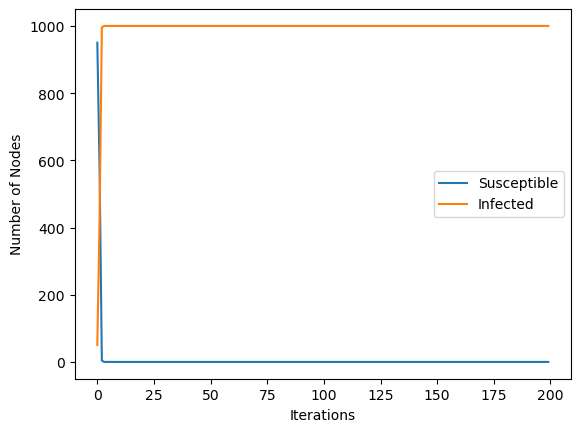

In [5]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Creazione della rete
G = nx.erdos_renyi_graph(1000, 0.1)

# Definizione del modello
model = ep.SIModel(G)

# Configurazione del modello
config = mc.Configuration()
config.add_model_parameter('beta', 0.1)  # Probabilità di trasmissione
model.set_initial_status(config)

# Esecuzione della simulazione
iterations = model.iteration_bunch(200)

# Analisi dei risultati
import matplotlib.pyplot as plt

susceptible = []
infected = []

for iteration in iterations:
    susceptible.append(iteration['node_count'][0])
    infected.append(iteration['node_count'][1])

plt.plot(susceptible, label='Susceptible')
plt.plot(infected, label='Infected')
plt.xlabel('Iterations')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()
